# Exploratory Data Analysis  
---

## Import dataset with Pandas.

In [25]:
import pandas as pd

df = pd.read_csv("../data/raw_data.csv")
df.head()


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


## Display general info.

In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Identify missing values and duplicates.

In [27]:
print(df.isnull().values.any())

print(df.duplicated().any())

False
False


### 📊 Variable Distributions

The histograms below visualize how each numerical feature is distributed.  
We can easily detect patterns, outliers, and possible missing data issues.

- **Pregnancies:** Mostly low counts, right-skewed — most women have between 0 and 5 pregnancies.  
- **Glucose:** Slightly right-skewed with a normal-like shape — a few high values that might represent outliers.  
- **BloodPressure:** Centered around 70–80 mm Hg — looks roughly normal, but some zeros are unrealistic and may need cleaning.  
- **SkinThickness:** Very right-skewed — many zero values, likely missing data.  
- **Insulin:** Highly right-skewed — a large number of zeros suggest unrecorded measurements.  
- **BMI:** Roughly normal distribution centered around 30 — indicates many participants are overweight or obese.  
- **DiabetesPedigreeFunction:** Right-skewed — most participants have low genetic risk, with a few higher-risk cases.  
- **Age:** Concentrated between 20 and 50 years — fewer older individuals in the dataset.  

---

🧠 **Interpretation**

These distributions highlight several key points:
- Some variables (like `Insulin` and `SkinThickness`) have **many zero values** that may represent missing data.  
- Most features are **right-skewed**, suggesting that **normalization or transformation** might be needed before modeling.  
- The data shows **realistic population patterns** — e.g., BMI around 30 and glucose peaking near 120–140 mg/dL.  
- Understanding these shapes helps in **detecting outliers**, **deciding preprocessing steps**, and **choosing suitable algorithms**.


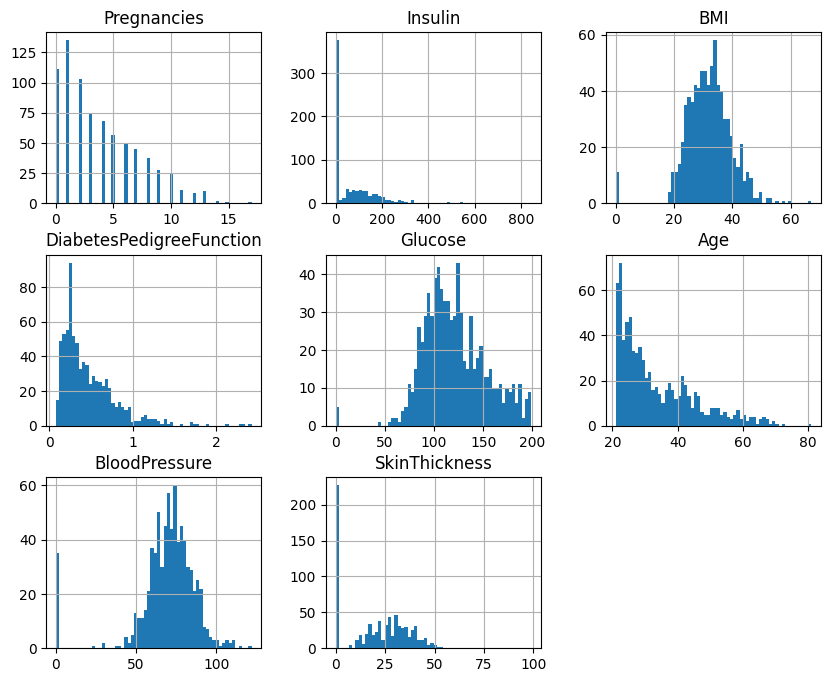

In [28]:
import matplotlib.pyplot as plt

df[[
    'Pregnancies',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction', 
    'Glucose',
    'Age',
    'BloodPressure',
    'SkinThickness'
        ]].hist(bins=60, figsize=(10,8))
plt.show()

## Create correlation heatmap.

In [29]:
numeric_df = df[[
    'Pregnancies',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction', 
    'Glucose',
    'Age',
    'BloodPressure',
    'SkinThickness'
        ]]
corr_matrix = numeric_df.corr()
print(corr_matrix)

                          Pregnancies   Insulin       BMI  \
Pregnancies                  1.000000 -0.073535  0.017683   
Insulin                     -0.073535  1.000000  0.197859   
BMI                          0.017683  0.197859  1.000000   
DiabetesPedigreeFunction    -0.033523  0.185071  0.140647   
Glucose                      0.129459  0.331357  0.221071   
Age                          0.544341 -0.042163  0.036242   
BloodPressure                0.141282  0.088933  0.281805   
SkinThickness               -0.081672  0.436783  0.392573   

                          DiabetesPedigreeFunction   Glucose       Age  \
Pregnancies                              -0.033523  0.129459  0.544341   
Insulin                                   0.185071  0.331357 -0.042163   
BMI                                       0.140647  0.221071  0.036242   
DiabetesPedigreeFunction                  1.000000  0.137337  0.033561   
Glucose                                   0.137337  1.000000  0.263514   
Age   

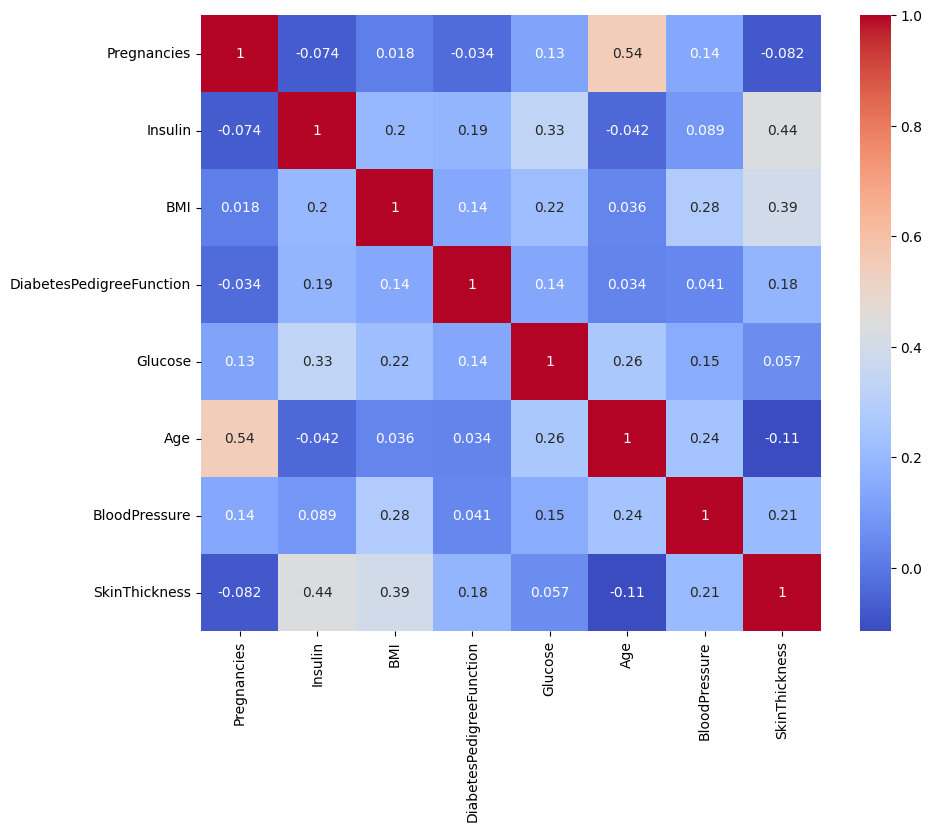

In [30]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()